$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 6: Neural Networks

Yashad Samant

## Overview

You will write and apply code that trains neural networks of various numbers of hidden layers and units in each hidden layer and returns results as specified below.  You will do this once for a regression problem and once for a classification problem. 

## Required Code

In [1]:
import numpy as np
import neuralnetworks as nn
nnet = nn.NeuralNetwork
import mlutils as ml
import scaledconjugategradient as scg
import time
import pandas as pd

In [2]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    results=[] 
    for i in range(len(hiddenLayerStructures)):
        rmse_train = []
        rmse_test = []
        t0 = time.time()
        for j in range(numberRepetitions):  
            Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(trainFraction,1-trainFraction),classify)
            if classify==False:
                nnet = nn.NeuralNetwork(X.shape[1], hiddenLayerStructures[i], T.shape[1])
            else:                      
                uniqT=np.unique(T)
                nnet=nn.NeuralNetworkClassifier(X.shape[1],hiddenLayerStructures[i],len(uniqT))
            nnet.train(Xtrain, Ttrain, numberIterations)
            Ytrain=nnet.use(Xtrain)
            Ytest=nnet.use(Xtest) 
            if classify==False:
                rmse_train.append(np.sqrt(np.mean((Ytrain-Ttrain)**2)))
                rmse_test.append(np.sqrt(np.mean((Ytest-Ttest)**2)))    
            else:
                rmse_train.append(np.sum(Ytrain!=Ttrain)/len(Ttrain))
                rsme_test.append(np.sum(Ytest!=Ttest)/len(Ttest))                
   
        results.append([hiddenLayerStructures[i],rmse_train,rmse_test,time.time()-t0])
    
    return results
            

In [3]:
def summarize(result):
    results = []
    for i in range(len(result)):
        rmse_train = np.mean(result[i][1])
        rmse_test = np.mean(result[i][2])
        final_output = [result[i][0], rmse_train, rmse_test, result[i][3]]
        print()
        results.append(final_output)
    return results
    

In [58]:
def bestNetwork(result):
    lowest = []
    for i in range(len(result)):
        lowest.append(result[i][2])
    minimum = np.min(lowest)
    l = lowest.index(minimum)
    return result[l]
            

## Examples


In [5]:
X = np.arange(10).reshape((-1,1))
T = X + 1 + np.random.uniform(-1, 1, ((10,1)))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

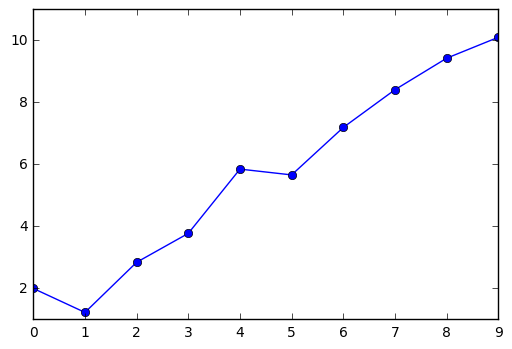

In [7]:
plt.plot(X, T, 'o-');

In [8]:
nnet = nn.NeuralNetwork(X.shape[1], 2, T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.21686202,  0.13266461,  0.12103347,  0.11465751,
        0.11429101,  0.11428547,  0.11420192,  0.11411692,  0.1141116 ,
        0.1141116 ,  0.1141116 ,  0.1141116 ,  0.11318406,  0.11162747,
        0.11159655,  0.11110523,  0.11031396,  0.10903029,  0.10895866,
        0.10895408,  0.10886107,  0.10882016,  0.10881905,  0.10880346,
        0.10879352,  0.10879226,  0.10873561,  0.10873494,  0.10870148,
        0.10867978,  0.10867728,  0.10867698,  0.10866874,  0.10866592,
        0.10866325,  0.10866325,  0.10866325,  0.10866325,  0.10866325,
        0.10866325,  0.10866325,  0.10866325,  0.10866325,  0.10866325,
        0.1086351 ,  0.10863057,  0.10858939,  0.10858551,  0.10858289,
        0.10853422,  0.10853387,  0.10853109,  0.10852686,  0.10848637,
        0.10848373,  0.10848184,  0.10841913,  0.10841794,  0.10841661,
        0.10839066,  0.10838042,  0.10838006,  0.10837024,  0.10836489,
        0.10835988,  0.10835783,  0.10835649,  0.10834836,  0.10

In [9]:
nnet = nn.NeuralNetwork(X.shape[1], [5, 5, 5], T.shape[1])
nnet.train(X, T, 100)
nnet.getErrorTrace()

array([ 0.70710678,  0.31881403,  0.31881403,  0.31881403,  0.31881403,
        0.31881403,  0.31881403,  0.31881403,  0.31881403,  0.31881403,
        0.17892203,  0.12202   ,  0.11279739,  0.11277897,  0.11271746,
        0.11212121,  0.11158077,  0.11156569,  0.11155586,  0.11154782,
        0.11154532,  0.11153808,  0.11152163,  0.11150348,  0.11149556,
        0.11149268,  0.11146616,  0.11144095,  0.11138411,  0.11137948,
        0.11137147,  0.11136291,  0.11134781,  0.11133983,  0.11133431,
        0.11130828,  0.11130368,  0.11128871,  0.11128368,  0.11126962,
        0.11126596,  0.11122721,  0.11120675,  0.11119317,  0.11119317,
        0.11119317,  0.11119317,  0.11119317,  0.11119317,  0.11119317,
        0.11119317,  0.11119317,  0.11119317,  0.11119317,  0.11119317,
        0.11119317,  0.11119317,  0.11119317,  0.11119317,  0.11119317,
        0.11119317,  0.11039916,  0.11034955,  0.11003405,  0.109985  ,
        0.1099699 ,  0.10996092,  0.10993427,  0.10993234,  0.10

In [10]:
results = trainNNs(X, T, 0.8, [2, 10, [10, 10]], 5, 100, classify=False)
results
#summary = summarize(results)

[[2,
  [0.28037008478170428,
   0.35122084830498496,
   0.35885296118618293,
   0.20177630034102761,
   0.067984108740625188],
  [0.62719284130118436,
   0.54315369999094376,
   1.3308184629539579,
   0.86431222377911587,
   1.1955482763781833],
  0.1226043701171875],
 [10,
  [0.25527253291021029,
   0.20932848137843418,
   0.056064215946746772,
   0.068152390234568871,
   0.23188480252477986],
  [1.0919656451827497,
   0.83214682676881135,
   0.94427769457499278,
   1.060497692095888,
   1.6874146508736916],
  0.11064434051513672],
 [[10, 10],
  [0.30910509519898277,
   0.21779105801363252,
   0.027089601543615942,
   0.094789675320217898,
   0.073046565160342455],
  [1.4478223224198841,
   1.0366608244649735,
   2.144458360504963,
   1.612207224525368,
   1.5143723382947682],
  0.14093017578125]]

In [ ]:
results = trainNNs(X, T, 0.8, [0, 1, 2, 10, [10, 10], [5, 5, 5, 5], [2]*5], 50, 400, classify=False)
results

In [11]:
summarize(results)

[[2, 0.25204086067090498, 0.91220510088067697, 0.1226043701171875],
 [10, 0.16414048459894798, 1.1232605018992268, 0.11064434051513672],
 [[10, 10], 0.14436439904735832, 1.5511042140419913, 0.14093017578125]]

In [59]:
best = bestNetwork(summarize(results))
print(best)
print('Hidden Layers {} Average RMSE Training {:.2f} Testing {:.2f} Took {:.2f} seconds'.format(*best))










[[20, 20], 61.711547252399626, 63.260977851277502, 139.03465938568115]
Hidden Layers [20, 20] Average RMSE Training 61.71 Testing 63.26 Took 139.03 seconds


## Data for Regression Experiment

From the UCI Machine Learning Repository, download the [Appliances energy prediction](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



Read this data into python.  One suggestion is to use the `loadtxt` function in the `numpy` package.  You may ignore the first column of each row which contains a data and time.  Also ignore the last two columns of random variables.  We will not use that in our modeling of this data.  You will also have to deal with the double quotes that surround every value in every field.  Read the first line of this file to get the names of the features.

Once you have read this in correctly, you should see values like this:

In [13]:

data = np.loadtxt("C:/Users/Yashad/Desktop/Books/AI/energydata_complete.csv", dtype = str, delimiter=',', usecols = range(1,27))

print(data.shape)

data = np.chararray.strip(data[0:],'"b\"')
data = np.chararray.strip(data[0:],"'\'")
data = np.chararray.strip(data[0:],'"')
names = data[0] 
Xnames = names[2:26]
Tnames = names[0:2]

data  = data[1:]
data = np.asarray(data,dtype=float)
Xenergy = data[:,2:]
Tenergy = data[:,0:2]

(19736, 26)


In [14]:
Xnames

chararray(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'], 
      dtype='<U28')

In [15]:
data.shape

(19735, 26)

In [16]:
data[:2,:]

array([[  60.        ,   30.        ,   19.89      ,   47.59666667,
          19.2       ,   44.79      ,   19.79      ,   44.73      ,
          19.        ,   45.56666667,   17.16666667,   55.2       ,
           7.02666667,   84.25666667,   17.2       ,   41.62666667,
          18.2       ,   48.9       ,   17.03333333,   45.53      ,
           6.6       ,  733.5       ,   92.        ,    7.        ,
          63.        ,    5.3       ],
       [  60.        ,   30.        ,   19.89      ,   46.69333333,
          19.2       ,   44.7225    ,   19.79      ,   44.79      ,
          19.        ,   45.9925    ,   17.16666667,   55.2       ,
           6.83333333,   84.06333333,   17.2       ,   41.56      ,
          18.2       ,   48.86333333,   17.06666667,   45.56      ,
           6.48333333,  733.6       ,   92.        ,    6.66666667,
          59.16666667,    5.2       ]])

Use the first two columns, labelled `Appliances` and `lights` as the target variables, and the remaining 24 columns as the input features.  So

In [17]:
Xenergy.shape, Tenergy.shape

((19735, 24), (19735, 2))

In [18]:
Xnames

chararray(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'], 
      dtype='<U28')

In [19]:
Tnames

chararray(['Appliances', 'lights'], 
      dtype='<U28')

Train several neural networks on all of this data for 100 iterations.  Plot the error trace (nnet.getErrorTrace()) to help you decide now many iterations might be needed.  100 may not be enough.  If for your larger networks the error is still decreasing after 100 iterations you should train all nets for more than 100 iterations.

Now use your `trainNNs`, `summarize`, and `bestNetwork` functions on this data to investigate various network sizes.

In [84]:
results = trainNNs(Xenergy, Tenergy, 0.8, [0, 5, 20, 50,80,[2,2], [3,3],[5, 5], [10, 10], [20,20]], 10, 100)

In [56]:
summarize(results)

[[0, 67.022791380392647, 67.740536437794049, 5.701613664627075],
 [5, 65.262110232321362, 65.565603470044721, 33.67688465118408],
 [20, 62.948731536757137, 64.876250246765764, 77.03506255149841],
 [50, 61.61776174205049, 63.54044869319371, 161.25538206100464],
 [80, 61.236792863781815, 63.27307558174509, 270.69817447662354],
 [[3, 3], 65.533823484026144, 67.301097686858824, 38.19560742378235],
 [[5, 5], 64.862738213931863, 66.11250869633929, 47.838775873184204],
 [[10, 10], 62.783771585665377, 65.222349305360552, 81.29992532730103],
 [[20, 20], 61.711547252399626, 63.260977851277502, 139.03465938568115]]

In [60]:
bestNetwork(summarize(results))

[[20, 20], 61.711547252399626, 63.260977851277502, 139.03465938568115]

(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)


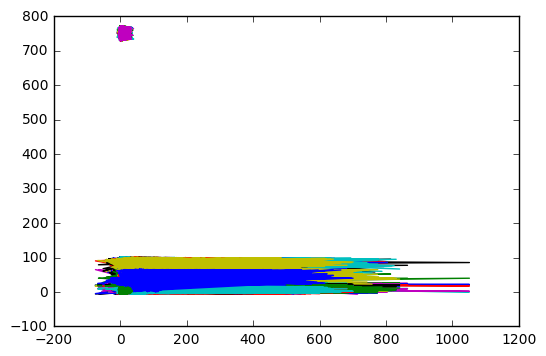

In [87]:
for j in range(10):  
        Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xenergy,Tenergy,(0.8,0.2),False)
        print (Xtrain.shape)
        print (Ttrain.shape)
        nnet = nn.NeuralNetwork(Xtrain.shape[1], [20,20], Ttrain.shape[1])
        nnet.train(Xtrain, Ttrain, 1000)
        Ytrain=nnet.use(Xtrain)
        Ytest=nnet.use(Xtest) 
        plt.plot(Ytrain, Xtrain)  

    

(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)
(15788, 24)
(15788, 2)


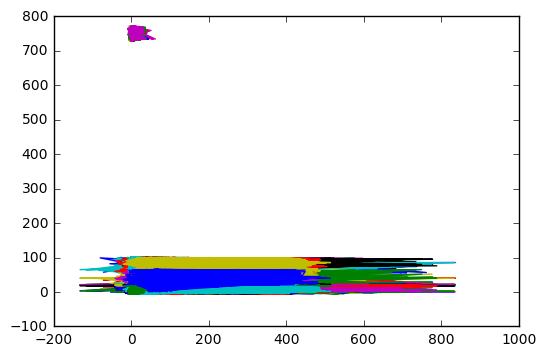

In [92]:
for j in range(10):  
        Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xenergy,Tenergy,(0.8,0.2),False)
        print (Xtrain.shape)
        print (Ttrain.shape)
        nnet = nn.NeuralNetwork(Xtrain.shape[1], [20,20], Ttrain.shape[1])
        nnet.train(Xtrain, Ttrain, 1000)
        Ytrain=nnet.use(Xtrain)
        Ytest=nnet.use(Xtest) 
        plt.plot(Ytrain, Xtrain)   

    

In [78]:
Tenergy[:,0]

array([  60.,   60.,   50., ...,  270.,  420.,  430.])

Test at least 10 different hidden layer structures.  Larger numbers of layers and units may do the best on training data, but not on testing data. Why?

Now train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date).  As before use `ml.partition` to produce the training and testing sets.

For the testing data, plot the predicted and actual `Appliances` energy use, and the predicted and actual `lights` energy use, in two separate plots.  Discuss what you see.

## Data for Classification Experiment

From the UCI Machine Learning Repository, download the [Anuran Calls (MFCCs)](http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29) data.  You can do this by visiting the Data Folder for this data set, or just do this:

     !wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00406/Anuran Calls (MFCCs).zip'
     !unzip Anuran*zip
     
Read the data in the file `Frogs_MFCCs.csv` into python.  This will be a little tricky. Each line of the file is a sample of audio features plus three columns that label the sample by family, genus, and species. We will try to predict the species.  The tricky part is that the species is given as text.  We need to convert this to a target class, as an integer. The `numpy` function `unique` will come in handy here.

In [54]:
species_convert = lambda x: 0 if b'AdenomeraAndre' in x else 1 if b'AdenomeraHylaedactylus' else 2 if b'Ameeregatrivittata' else 3 if b'HylaMinuta' else 4 if b'HypsiboasCinerascens' else 5 if b'HypsiboasCordobae' else 6 if b'LeptodactylusFuscus' else 7 if b'OsteocephalusOophagus' else 8 if b'Rhinellagranulosa' else 9    
data = np.loadtxt('C:/Users/Yashad/Desktop/Books/AI/Frogs_MFCCs.csv',delimiter = ',',dtype = str,usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24),converters = {24: species_convert})
print(data.shape)
data = np.chararray.strip(data,'"')
data = np.chararray.strip(data,'b')
data = np.chararray.strip(data,'"')
data = np.asarray(data,dtype=str)
print(data)
names = data[0]
print(names) 
Xanuran = data[1:,:22]
Tanuran = data[1:,22:]
Xanuran = np.chararray.strip(Xanuran,'"')
Xanuran = np.asarray(Xanuran,dtype=float) 
#Tanuran = np.asarray(Tanuran, dtype=int)
Xanuran.shape, Tanuran.shape
Xnames = names[:22]
Tnames = names[22:]
Xnames, Tnames

(7196, 23)
[["'MFCCs_ 1'" "'MFCCs_ 2'" "'MFCCs_ 3'" ..., "'MFCCs_21'" "'MFCCs_22'" '1']
 ["'1'" "'0.152936298220384'" "'-0.105585902844019'" ...,
  "'0.118680135068692'" "'0.0140384456733697'" '0']
 ["'1'" "'0.171534257314109'" "'-0.0989747371205295'" ...,
  "'0.0822629868835422'" "'0.0290557421631693'" '0']
 ..., 
 ["'1'" "'-0.582556780749031'" "'-0.343237394473775'" ...,
  "'-0.000530614769783166'" "'-0.0804253341452265'" '1']
 ["'1'" "'-0.519497158109369'" "'-0.307553060247487'" ...,
  "'-0.0279113833801593'" "'-0.0968953697801283'" '1']
 ["'1'" "'-0.50883317808137'" "'-0.324105836835993'" ...,
  "'-0.0293554758329867'" "'-0.0879096247852919'" '1']]
["'MFCCs_ 1'" "'MFCCs_ 2'" "'MFCCs_ 3'" "'MFCCs_ 4'" "'MFCCs_ 5'"
 "'MFCCs_ 6'" "'MFCCs_ 7'" "'MFCCs_ 8'" "'MFCCs_ 9'" "'MFCCs_10'"
 "'MFCCs_11'" "'MFCCs_12'" "'MFCCs_13'" "'MFCCs_14'" "'MFCCs_15'"
 "'MFCCs_16'" "'MFCCs_17'" "'MFCCs_18'" "'MFCCs_19'" "'MFCCs_20'"
 "'MFCCs_21'" "'MFCCs_22'" '1']


ValueError: could not convert string to float: "'1'"

In [27]:
Xanuran.shape, Tanuran.shape

((7195, 22), (7195, 1))

In [28]:
Xanuran[:2,:]

chararray([["'1'", "'0.152936298220384'", "'-0.105585902844019'",
        "'0.200721914808566'", "'0.317201062343259'",
        "'0.260763853131077'", "'0.100944640810053'",
        "'-0.150062604917616'", "'-0.17112763198601'",
        "'0.124676436148438'", "'0.188654145822323'",
        "'-0.0756217229244772'", "'-0.156435925226375'",
        "'0.0822451152835443'", "'0.135752042383891'",
        "'-0.0240166450287792'", "'-0.108351107221198'",
        "'-0.0776225214037558'", "'-0.00956780151914234'",
        "'0.0576839754007957'", "'0.118680135068692'",
        "'0.0140384456733697'"],
       ["'1'", "'0.171534257314109'", "'-0.0989747371205295'",
        "'0.268425220827017'", "'0.338671862995453'",
        "'0.268353099863332'", "'0.0608350871920449'",
        "'-0.222474640379244'", "'-0.207692670568256'",
        "'0.170882873543032'", "'0.27095827998887'",
        "'-0.0950039445276873'", "'-0.254341468381362'",
        "'0.0227862345814336'", "'0.163320101050209'",
        

In [29]:
Tanuran[:2]

chararray([['0'],
       ['0']], 
      dtype='<U24')

In [30]:
for i in range(10):
    print('{} samples in class {}'.format(np.sum(Tanuran==i), i))

TypeError: comparison of non-string arrays

In [ ]:
results = trainNNs(Xanuran, Tanuran, 0.8, [0, 5, 20, 50,80, [3,3],[5, 5], [10, 10], [20,20]], 5, 100, classify=True)

In [ ]:
summarize(results)

In [ ]:
bestNetwork(summarize(results))

Now do an investigation like you did for the regression data. 

Test at least 10 different hidden layer structures. Then train another network with your best hidden layer structure on 0.8 of the data and use the trained network on the testing data (the remaining 0.2 of the date). 

Plot the predicted and actual `Species` for the testing data as an integer.  Discuss what you see.

## Grading

Download [A6grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A6grader.tar) and extract `A6grader.py` from it.

In [61]:
%run -i "A6grader.py"


Testing summarize([[[1,1], [1.2, 1.3, 1.4], [2.2, 2.3, 2.4], 0.5], [[2,2,2], [4.4, 4.3, 4.2], [6.5, 6.4, 6.3], 0.6]])



--- 10/10 points. Correctly returned [[[1, 1], 1.3, 2.3000000000000003, 0.5], [[2, 2, 2], 4.2999999999999998, 6.3999999999999995, 0.6]]

Testing bestNetwork([[[1, 1], 1.3, 2.3, 0.5], [[2, 2, 2], 4.3, 1.3, 0.6]])

--- 10/10 points. Correctly returned [[2, 2, 2], 4.3, 1.3, 0.6]

X = np.random.uniform(-1, 1, (100, 3))
T = np.hstack(((X**2 - 0.2*X**3).sum(axis=1,keepdims=True),
               (np.sin(X)).sum(axis=1,keepdims=True)))
result = trainNNs(X, T, 0.7, [0, 5, 10, [20, 20]], 10, 100, False)

--- 20/20 points. Correct.

Testing bestNetwork(summarize(result))





--- 20/20 points. You correctly found that network [20, 20] is best.

C:\Users\Yashad\Desktop\git\Artificial-Intelligence Execution Grade is 60/60

======================= The regression data set =======================

--- _/5 points. Read the data in energydata_complete.csv into variables Xenergy and T

## Check-in

In [ ]:
list1 = [[0,
                      [0.38, 0.37, 0.39, 0.36, 0.33, 0.37, 0.38, 0.39, 0.38, 0.38],
                      [0.36, 0.39, 0.35, 0.42, 0.47, 0.40, 0.37, 0.34, 0.38, 0.38],
                      0.03],
                     [5,
                      [0.08, 0.07, 0.06, 0.08, 0.09, 0.05, 0.06, 0.08, 0.05, 0.09],
                      [0.11, 0.10, 0.06, 0.10, 0.13, 0.06, 0.12, 0.10, 0.07, 0.12],
                      0.84],
                     [10,
                      [0.05, 0.04, 0.05, 0.03, 0.04, 0.05, 0.04, 0.04, 0.04, 0.05],
                      [0.07, 0.05, 0.08, 0.08, 0.07, 0.09, 0.07, 0.07, 0.07, 0.08],
                      0.76],
                     [[20, 20],
                      [0.02, 0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03],
                      [0.06, 0.07, 0.05, 0.05, 0.04, 0.05, 0.07, 0.06, 0.06, 0.11],
                      1.52]]
len(list1)

Do not include this section in your notebook.

Name your notebook ```Lastname-A6.ipynb```.  So, for me it would be ```Anderson-A3.ipynb```.  Submit the file using the ```Assignment 3``` link on [Canvas](https://colostate.instructure.com/courses/41327).

## Extra Credit

  2. Repeat the above regression and classification experiments with a second regression data set and a second classification data set.
  
  2. Since you are collecting the performance of all repetitions for each network structure, you can calculate a confidence interval about the mean, to help judge significant differences. Do this for either the regression or the classification data and plot the mean test performance with confidence intervals for each network structure tested.  Discuss the statistical significance of the differences among the means.  One website I found to help with this is the site [Correct way to obtain confidence interval with scipy](https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy).
  
